<span style="color:red">Exam Grade: 3.25</span>

  Q 1: 8.0

  Q 2: 3.0

  Q 3: 1.0

  Q 4: 1.0

  Exam grade is average of question grades. 

  Comments: 
  
      1.3) Don't fit with sympy! Use curve_fit from scipy. There's a reason this has been automated for decades. 4/10

    Q2 comments: 2.1: Forgot to evaluate derivative at zero. (3/4) 2.2: Not attempted. (0/4) 2.3: Not attempted. (0/2)

q3 comments: attempted but no euler step algorithm or plots. 


# Final Exam PHYS248/MATH248
**Saturday April 14th, 2018, 9am - 12pm (3 hrs)**

You are free to use all the course resources, as well as internet sources such as Python documentation web-pages and web search results. You must not have any communications by any means with people, other than the exam invigilators. 

If not explicitly stated otherwise, you are free to choose whichever library to use, including your own modules.  If you do use your own module, include it in your final exam directory.

Save your final exam (early and often!) in your Bitbucket repository, in `mp248/final/final.ipynb`.

Please include any other files or modules you will need to make your i-python notebook run in the `mp248/final` directory.

* * *

## Problem 1

### 1.1
In the `Quizzes_Assignments_Exams` directory you will find a file `sunspots.txt` which contains the observed number of sunspots for each month since 1749. Copy that file into the `final` directory of your repo and commit it along with the other file(s) to your repository. The file contains two columns with the month number and the sunspot number.

Read the data and make a graph as a function of time.  The arrays for month and number of sunspots are to be called `month` and `nr_sunsp`. Determine how many data point pairs are in the data set and print that number out embedded in a complete and formatted sentence.

Create down sampled data sets `month_sparse` and `nr_sunsp_sparse` by retaining only every $15^\mathrm{th}$ data pair. In other words, keep the first data pair, then skip 14, then keep the 15th, and so on.

Plot both the down-sampled data set and the original data set for month 900 to 1700.

In [2]:
#Read from file the months and number of sunspots
g_array = loadtxt('sunspots.txt')

In [4]:
g_array

array([[  0.00000000e+00,   5.80000000e+01],
       [  1.00000000e+00,   6.26000000e+01],
       [  2.00000000e+00,   7.00000000e+01],
       ..., 
       [  3.14000000e+03,   2.52000000e+01],
       [  3.14100000e+03,   2.35000000e+01],
       [  3.14200000e+03,   2.16000000e+01]])

In [25]:
#Put the values in two arrays
month = []
nr_sunsp = []
count = 0

for i in range(len(g_array)):
    month.append(g_array[i][0])
    if(g_array[i][1] in nr_sunsp):
        count += 1
    nr_sunsp.append(g_array[i][1])
#print("Month = ",month, "Number of Sunspots = ", nr_sunsp)
print("The number of data point pairs are = ", count)

The number of data point pairs are =  1926


In [24]:
# Creating month_sparse and nr_sunsp_sparce
month_sparse = []
nr_sunsp_sparse = []
frac = len(g_array)/15
frac = int(frac)


for i in range(frac):
    month_sparse.append(month[i*15])
    nr_sunsp_sparse.append(nr_sunsp[i*15])
#print("Month_sparce = ",month_sparse, "Number of Sunspots_sparce = ", nr_sunsp_sparse)

<IPython.core.display.Javascript object>


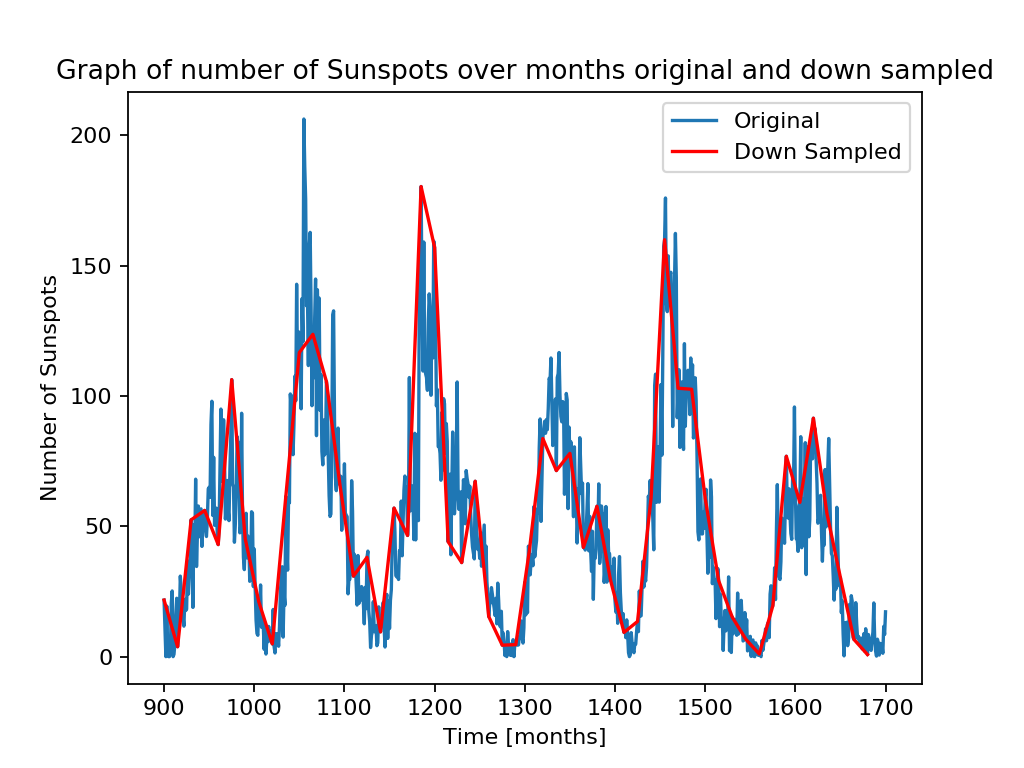

In [236]:
# Plotting the original set from month: 900 - 1700
ifig = 1; figure(ifig)

x = []
y = []
for i in range(900, 1701): #print(i)
    x.append(month[i])
    y.append(nr_sunsp[i])
    
plot(x, y, '-', label="Original")
legend()


#Plotting down sampled from month 900 - 1700
x_sp = []
y_sp = []
tmp = 1700/15
tmp = int(tmp)
for i in range (60, tmp):
    x_sp.append(month_sparse[i])
    y_sp.append(nr_sunsp_sparse[i])
print()
plot(x_sp, y_sp, 'r-', label="Down Sampled")
legend()
xlabel("Time [months]"), ylabel("Number of Sunspots")
title("Graph of number of Sunspots over months original and down sampled")

In [38]:
#900/15
#1700/15
#tmp

113

### 1.2
Plot a histogram of the number of all sunspots with 10 bins. This shows the number times the measured number of sunspots is in each of the 10 sunspot number bins. Extract the data points of the distribution function and overplot with single dots. Make sure that these dots are properly centered for each bin.

<IPython.core.display.Javascript object>


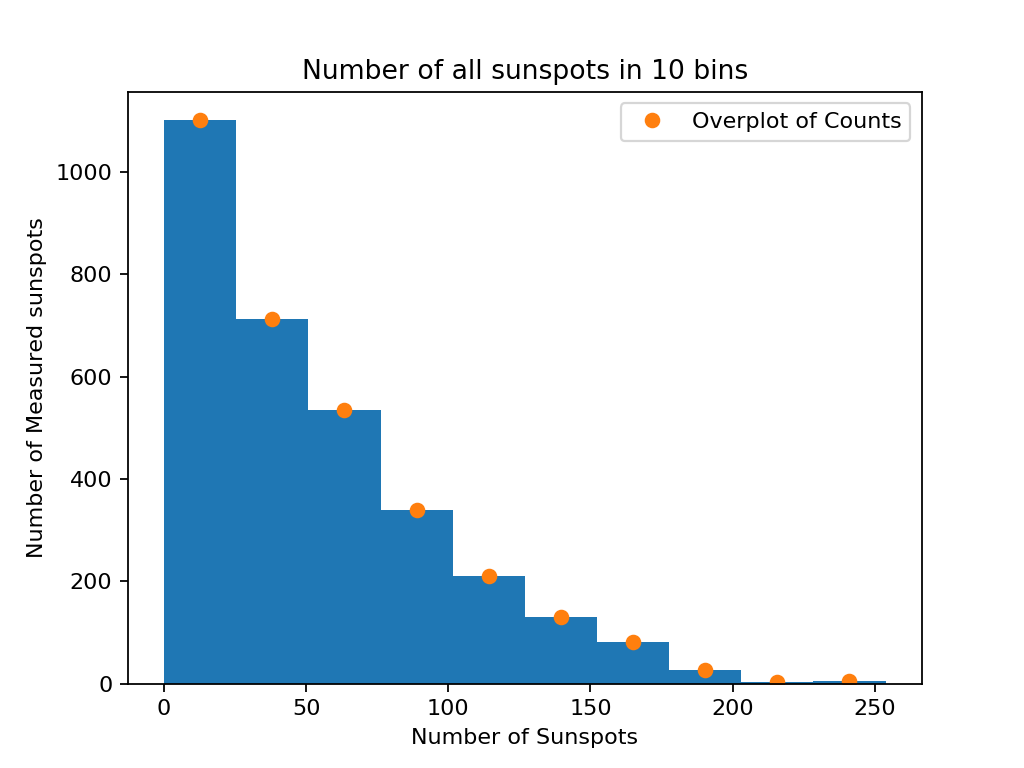

[12.690000000000001, 38.070000000000007, 63.45000000000001, 88.830000000000013, 114.21000000000001, 139.59, 164.97, 190.34999999999999, 215.72999999999999, 241.10999999999999]


In [69]:
ifig = 2; close(ifig); figure(ifig)
counts, bins, bars = hist(nr_sunsp, 10)
title("Number of all sunspots in 10 bins")
xlabel("Number of Sunspots"), ylabel("Number of Measured sunspots")

x_bins = []
iterator = bins[1]/2
x_bins.append(iterator)
for i in range(2, 11):
    iterator = iterator + bins[1]
    x_bins.append(iterator)
plot(x_bins, counts, 'o', label= "Overplot of Counts")
legend()
print(x_bins)

In [66]:
#counts, bins, bars = plt.hist(nr_sunsp, 10)
#print(counts, bars, bins)

### 1.3
Fit the sunspot distribution function. Perform a least-square fit of an exponential with three parameters
$$
P_\mathrm{spots}(x) = a e^{bx} +c
$$
where $x=N_\mathrm{spots}$ is the number of sunspots measured.

Plot the distribution function data and fit together. Round the fit parameters appropriately and write your final fit formula in a Markdown cell. 

In [67]:
%pylab nbagg

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [147]:
import sympy as sp
# The exponential

a, b, c, x = sp.symbols('a b c x')
f = sp.Function('f')

def exponential(a, b, c, x):
    return(a*sp.exp(b*x) + c)

f= exponential(a, b, c, x)
#sp.pprint(f)

<IPython.core.display.Javascript object>


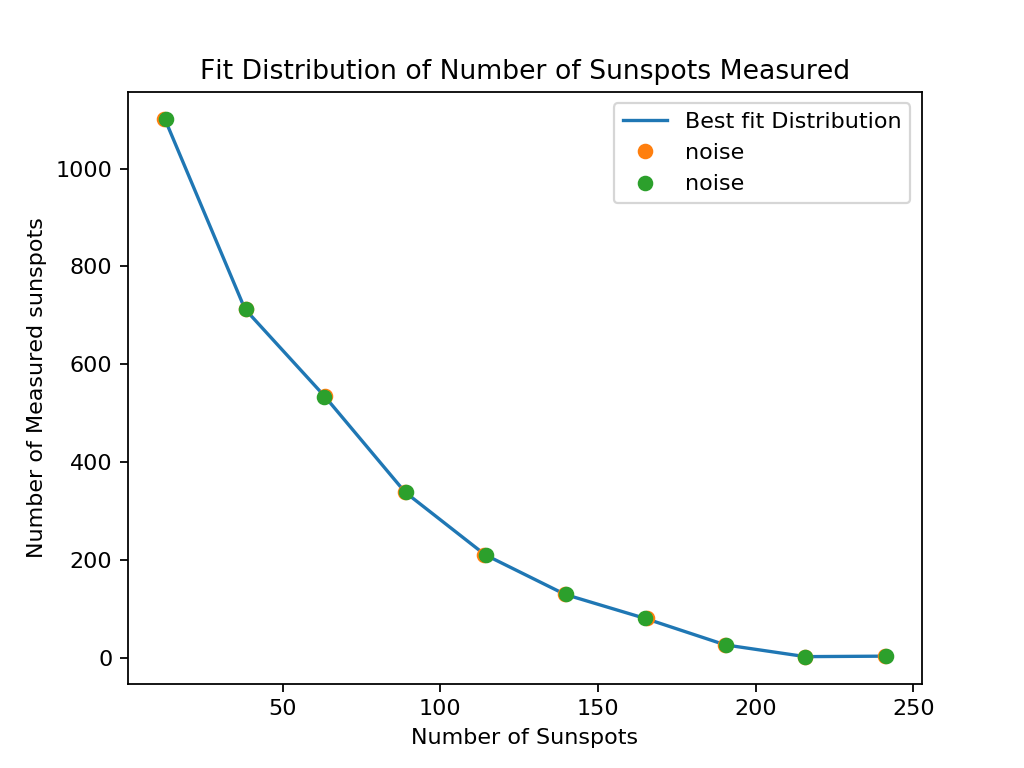

(<matplotlib.text.Text at 0x7fb3f99f1f28>,
 <matplotlib.text.Text at 0x7fb3f80e44a8>)

In [155]:
# Fit the sunspot distribution function
ifig = 3; close(ifig); figure(ifig)
plot(x_bins, counts, '-', label= "Best fit Distribution")
legend()
title("Fit Distribution of Number of Sunspots Measured")
xlabel("Number of Sunspots"), ylabel("Number of Measured sunspots")




In [152]:
for i in range(len(x_bins)): 
    f = exponential(a, b, c, x_bins[i])
    sp.pprint(f)

   12.69⋅b    
a⋅ℯ        + c
   38.07⋅b    
a⋅ℯ        + c
   63.45⋅b    
a⋅ℯ        + c
   88.83⋅b    
a⋅ℯ        + c
   114.21⋅b    
a⋅ℯ         + c
   139.59⋅b    
a⋅ℯ         + c
   164.97⋅b    
a⋅ℯ         + c
   190.35⋅b    
a⋅ℯ         + c
   215.73⋅b    
a⋅ℯ         + c
   241.11⋅b    
a⋅ℯ         + c


In [160]:
#ifig = 3; close(ifig); figure(ifig)

noise_level=0.2
noisy_x = x_bins + noise_level*randn(len(x_bins))
noisy_y = counts + noise_level*randn(len(x_bins))
plot(noisy_x, noisy_y, 'o', label = 'noise')
legend()

[  13.14247173   38.52687081   63.01042979   89.24750835  114.4068932
  139.71892874  164.97086809  190.41796738  215.48887898  241.13569847]


In [237]:
fitpars, covmat = curve_fit(exponential,noisy_x,noisy_y,p0=[1.5,-1.5,0.1])

TypeError: Cannot cast array data from dtype('O') to dtype('float64') according to the rule 'safe'

error: Result from function call is not a proper array of floats.

In [238]:
## Using the noise points for x and y I could make a grab of least squares
## but I was having trouble with fitpars and covmat

## Problem 2

### 2.1
Write a function that takes as input a positive integer $k$, and uses Sympy to compute the degree $k$ Taylor polynomial for the function $y(x) = sin(x^2)$, centred at $x_0 = 0$, i.e. $T_k(x) = \sum_{i=0}^k\frac{d^i y}{dx^i}(x=0)  \frac{x^i}{i!}$.  Print the output using a Sympy *pprint* command, for $k=2,6,10,14,15$.

### 2.2
Write a function that takes as input a positive integer $k$, and uses Sympy to compute the degree $k$ polynomial *best fit* to $y(x) = sin(x^2)$ on the interval $[0,2\pi]$, using the least-squares technique. As in part 2.1, output your answers for $k=2,6,10,14,15$.

### 2.3
Write a function that takes as input a positive integer $k$.  Plot the function $y(x)=sin(x^2)$, together with the corresponding function from 2.1 and 2.2.  Include a legend.  For your $x$-bounds use the interval $[0, 2\pi]$, for the $y$-bounds use $[-1.2,1.2]$. Label your axis and give your plot an appropriate title (depending on $k$).  Include the plot for $k=10$ in your notebook. 

In [239]:
#Function
import sympy as sp #Just so this can be run before the sympy above
import mpmath as mp

## A function that takes as input a positive 
## integer k, and uses Sympy to compute the degree k Taylor polynomial for the function y(x) = sin(x^2)
def function(k, x = 0):
    y = sp.Function('y')
    x = sp.Symbol('x')

    y = sp.sin(x**2)
    T = sp.Function('T')
    
    T = 0
    for i in range(0, k): 
        T += y.diff(x)*(x**i/mp.fac(i))
        y = y.diff(x)
    return T
print("\n\nTaylor for 2: ")
sp.pprint(function(2))
print("\n\nTaylor for 6: ")
sp.pprint(function(6))
print("\n\nTaylor for 10: ")
sp.pprint(function(10))
print("\n\nTaylor for 14: ")
sp.pprint(function(14))
print("\n\nTaylor for 15: ")
sp.pprint(function(15))



Taylor for 2: 
      ⎛     2    ⎛ 2⎞        ⎛ 2⎞⎞            ⎛ 2⎞
1.0⋅x⋅⎝- 4⋅x ⋅sin⎝x ⎠ + 2⋅cos⎝x ⎠⎠ + 2.0⋅x⋅cos⎝x ⎠


Taylor for 6: 
                     5 ⎛      6    ⎛ 2⎞        4    ⎛ 2⎞        2    ⎛ 2⎞     
0.00833333333333333⋅x ⋅⎝- 64⋅x ⋅sin⎝x ⎠ + 480⋅x ⋅cos⎝x ⎠ + 720⋅x ⋅sin⎝x ⎠ - 12

     ⎛ 2⎞⎞                       4 ⎛    5    ⎛ 2⎞        3    ⎛ 2⎞            
0⋅cos⎝x ⎠⎠ + 0.0416666666666667⋅x ⋅⎝32⋅x ⋅cos⎝x ⎠ + 160⋅x ⋅sin⎝x ⎠ - 120⋅x⋅cos

⎛ 2⎞⎞                      3 ⎛    4    ⎛ 2⎞       2    ⎛ 2⎞         ⎛ 2⎞⎞     
⎝x ⎠⎠ + 0.166666666666667⋅x ⋅⎝16⋅x ⋅sin⎝x ⎠ - 48⋅x ⋅cos⎝x ⎠ - 12⋅sin⎝x ⎠⎠ + 0.

   2 ⎛     3    ⎛ 2⎞           ⎛ 2⎞⎞         ⎛     2    ⎛ 2⎞        ⎛ 2⎞⎞     
5⋅x ⋅⎝- 8⋅x ⋅cos⎝x ⎠ - 12⋅x⋅sin⎝x ⎠⎠ + 1.0⋅x⋅⎝- 4⋅x ⋅sin⎝x ⎠ + 2⋅cos⎝x ⎠⎠ + 2.

       ⎛ 2⎞
0⋅x⋅cos⎝x ⎠


Taylor for 10: 
                     9 ⎛        10    ⎛ 2⎞          8    ⎛ 2⎞           6    ⎛
2.75573192239859e-6⋅x ⋅⎝- 1024⋅x  ⋅sin⎝x ⎠ + 23040⋅x ⋅cos⎝x ⎠ + 161280⋅x ⋅sin⎝

 2⎞           4    ⎛ 2⎞    

In [109]:
#?mp.diffs()

## Problem 3

The _Belousov-Zhabotinsky reaction_ is a chemcial oscillator, a cocktail of chemicals which, when heated, undergoes a series of reactions that cause the chemical concentrations in the mixture to oscillate between two extremes. The following equations describe the evolution of the two concentrations in this chemical system:
$$
\frac{dx}{dt} = 1-(b+1)x+ax^2y\\
\frac{dy}{dt} = bx -ax^2y
$$
where $x$ and $y$ represent concentrations of two chemicals and $a$ and  $b$ are positive constants. 

Solve these equations (numerically) for $a=1$, $b=3$ with initial conditions $x=y=0$ and plot the solution. 

In [179]:
#Define the function
import sympy as sp
##Function for Belousov-Zhabotinsky dx/dt
def bel_zha1(a, b):
    dxdt = sp.Function('dx/dt')
    x, y, t = sp.symbols('x y t')
    dxdt = 1 - (b+1)*x + a*x**2*y
    x_f = sp.integrate(dxdt, t)
    return x_f

In [223]:
##Function for Belousov-Zhabotinsky dy/dt
def bel_zha2(a, b):
    dydt = sp.Function('dy/dt')
    y, t = sp.symbols('x t')
    dydt = b*x - a*x**2*y
    y_f = sp.integrate(dydt, t)
    #sp.pprint(y_f)
    return y_f

In [224]:
f = sp.Function('f')
f = bel_zha1(1,3)
F = sp.lambdify((x,y), f)
sp.pprint(f)
F(0,0)

  ⎛ 2            ⎞
t⋅⎝x ⋅y - 4⋅x + 1⎠


t

In [234]:
g = sp.Function('g')
g = bel_zha2(1, 3)
G = sp.lambdify((x,y), g)
sp.pprint(G(0,0))
#sp.pprint(G(x for x in range(0,10), 0))

SyntaxError: Generator expression must be parenthesized if not sole argument (<ipython-input-234-f21cdd5181ac>, line 5)

In [226]:
n = sp.Function('n')
n = bel_zha1(1,3)
sp.pprint(n)
m = sp.Function('m')
m = bel_zha2(1,3)
sp.pprint(m)
x, y, t = sp.symbols('x y t')

H = sp.lambdify((x,y,t), (n,m))
H(0,0,t)

  ⎛ 2            ⎞
t⋅⎝x ⋅y - 4⋅x + 1⎠
  ⎛   3      ⎞
t⋅⎝- x  + 3⋅x⎠


(t, 0)

<IPython.core.display.Javascript object>


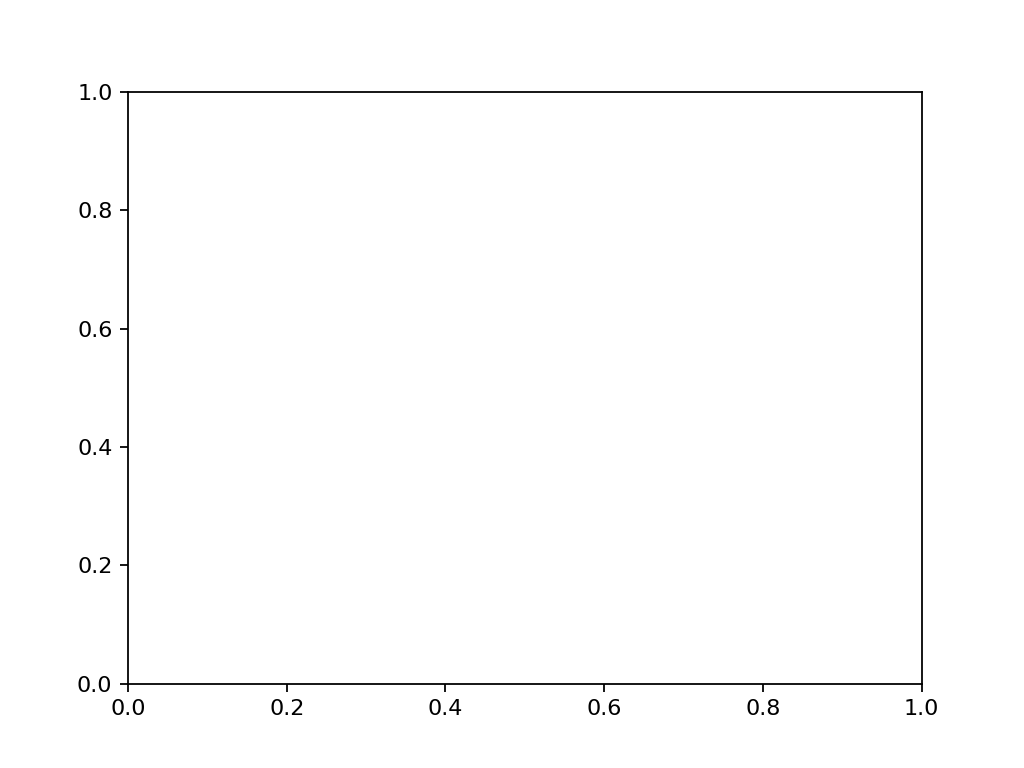

TypeError: object of type 'generator' has no len()

In [235]:
#Plot 
ifig = 4; close(ifig); figure(ifig)

#t = linspace(0, 10)
#x= 1
#y = 1
#t= 1

plot(t, (H(x, y, t)for x in (0, 10) for y in (0, 10) for t in (0, 10)), '-')

# Problem 4

In the `data` directory there is the text file `wdats.txt`. Copy this file into your `mp248/final` directory.   Each line of the file has a day of data for Victoria and Saskatoon.  The top line of the file explains the content of the remaining lines in the file.   In this problem we ask you to make a matplotlib interactive visualization of the data.

Use matplotlib `widgets` to control your interactive plot. Use a <a href="https://matplotlib.org/gallery/widgets/slider_demo.html">Slider</a> for the user to input the month as a number between 1 (January) and 12 (December).  Also have a <a href="https://matplotlib.org/gallery/widgets/radio_buttons.html">RadioButton</a> for the user to select between max, min and mean temperatures.

With the application running, when the user selects the month, and clicks on a radio button, the plot should update to show the temperatures for Victoria (horizontal axis) vs Saskatoon (vertical axis) for that month and with the convention chosen on the radio button.

This should be a properly interactive plot, that allows the user to dynamically change the month and radio button, with the plot automatically updating on every change.

If you find using the Slider or RadioButton feature difficult; rather than making an interactive plot, you could opt to make a callable function that takes two arguments: (1) the month as an integer between 1 and 12, and (2) a string 'Max', 'Min' or 'Mean'.  This function should then make the appropriate non-interactive Matplotlib plot, as described above.  Such an answer would receive (at best) a grade of 7/10.


In [1]:
# lets get the data
with open('wdats.txt') as f:
    first_line = f.readline()
    h_array = genfromtxt(f,dtype='str')
#
#h_array
first_line = list(first_line.split(','))
##h_array = list(h_array.split(','))
##for i in range(len(h_array)): h_array[i] = int(h_array[i])
#print(first_line)
print(h_array) 

## Unclear to what was bytes in the file, my list was not operating 
## as something I could draw the data from


TypeError: Can't convert 'bytes' object to str implicitly

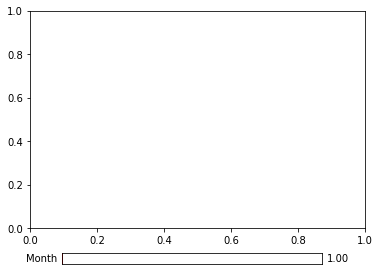

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets import Slider
import matplotlib.animation as animation
from scipy.integrate import odeint

#I = np.linspace(0, 2*np.pi, 300)
fig,ax = plt.subplots()

k = 1.0

#Make the slider
axfreq = plt.axes([0.2, 0.0, 0.6, 0.04])
kfreq = Slider(axfreq, 'Month', 1.0, 12.0, valinit=k)